## 從字庫裡面把字隨機挑出來組成二字詞或三字詞，然後強迫他們滿足Gaussian's law，之後用這些滿足Gaussian's law 的詞組成文本

In [1]:
import random 
import bisect 
import math 
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from count import *
#from zipfgen import ZipfGenerator
%matplotlib inline

In [2]:
class GaussianGenerator: 
    """
    GaussianGenerator is an immutable type representing a Gaussian CDF
    with patameters sigma and n; centre located at 1.0   

    """

    
    def __init__(self, n, sigma , mu = 20.0): 
        """Ininitialize a Gaussian CDF.
         Paramerters
         n: int 
            n >= 0
         
         sigma: float 
            sigma >= 1
            
         mu: float
        """
        # Calculate non-normalized cumulative values from 1 to n: 
        assert n >= 0 and sigma >= 1.0
        assert int(n) == n 
        self.n = n
        self.sigma = sigma
        self.mu = mu
        tmp = [math.exp(-(i - mu)**2 / (2 * sigma**2)) for i in range(1, n+1)] 
        zeta = reduce(lambda sums, x: sums + [sums[-1] + x], tmp, [0]) 

        # Store the translation map: 
        # Abstract function: representing the cumulative distribution function 
        # of a Gaussian pmf 
        self.distMap = [x / zeta[-1] for x in zeta] 

    def next(self): 
        """Yield an integer between 0 and n, with probability governed by 
        Zipf distribution function specified by n and alpha.
        """
        # Take a uniform 0-1 pseudo-random value: 
        u = random.random()  

        # Translate the Zipf variable: 
        return bisect.bisect(self.distMap, u) - 1
    
    def __get_alpha(self):
        ans = self.alpha
        return ans
    
    def __get_n(self):
        ans = self.n
        return ans



In [3]:
def check_const_ratio(data, feature= "wordRank", criteria = "wordFreq",max_range = 200):
    """Calculate the ratios of date in the feature column
    
    Parameters:
    ---
    data: numpy.DataFrame
        a data frame contains information about word stats.
    
    feature: string
        feature to be oberved
    
    max_range: int 
        the maximum lenth of wordRank to be covered
                
        
    
    Returns
    ---
    new: numpy.array
        a numpy array containing rotios of the data satisfying Ming's criteria in the feature column.
    
    """
    np_array = np.array([])
    
    for i in range(1,max_range):
        dd = data[data[criteria] == i]
        if dd.empty: break
        else:
            tmp = np.array(dd.tail(1)[feature])
            np_array = np.append(np_array,tmp)
        
    numer_array = np.append(np_array,[1])
    denom_array = np.append([1],np_array)
    new = numer_array / denom_array
    print(feature, " ratio: ",new[1:-1])
    print("std= ",new[1:-1].std())
    return new

In [4]:
def read_file_generate_fake(char_num = 2, out_file =  'fake1.txt', sample_word_num = 8000,
                            num_word_in_fake_scrip = 15000, 
                            alpha = 1.00001, noun = False):
    """Read "roc2.txt" file, and then generate a fake script satisfying Zipfs' law. All the words in 
    the output script share the same lenth char_num
    """
    SAMPLE_WORD_NUM = sample_word_num
    ALPHA = alpha
    NUM_WORD_IN_NOV = num_word_in_fake_scrip
    OUTPUT_FILE_NAME = out_file
    NOUN = noun
    CHAR_NUM = char_num
    
    gau_gen =  GaussianGenerator(SAMPLE_WORD_NUM,ALPHA)
    f =  open("roc2.txt","r")

    world_list = []
    
    for line in f:
        line_split = line.split("\t")
        if NOUN:
            if 'N' in line_split[4]:
                world_list.append(line_split[3])
        else:
            #if len(line_split[3]) == CHAR_NUM:
                world_list.append(line_split[3])

    f.close()
    
    for item in world_list:
        if item == " ":
            world_list.remove(item)
    #######################################
    ###these codes are optional 
    
    tmp_list = []
    for item in world_list:
        for e in list(item):
            tmp_list.append(e)
    random.shuffle(tmp_list)
    list_2 = []
    tmp = ''
    for e in tmp_list:
        tmp = tmp + e
        if len(tmp) == char_num:
            list_2.append(tmp)
            tmp = ''
    
    world_list = list_2

    print("words in a corpus: " ,len(world_list))
    
    
    #######################################


    print("A corpus is successfully loaded.")
    
    random.shuffle(world_list)
    small_world_list = world_list[-SAMPLE_WORD_NUM:]
    target_string_list = []

    for i in range(NUM_WORD_IN_NOV):
        num = gau_gen.next()
        w = small_world_list[num]
        target_string_list.append(w+" ")
        
    f2 = open(OUTPUT_FILE_NAME , 'w')

    word_count = 0
    for item in target_string_list:
        if word_count < 20:
            f2.write(item)
            word_count += 1
        else:
            word_count = 0
            f2.write(item+"\n")
    f2.close()
    print("A fake script is successfully created !")
    print("--------------------")
    return None

## 改動不同的參數以產生你想要的文本
#### 參數解釋：
* char_num: 假文本裡面每個單詞的字數
* out_file: 輸出的假文本的檔名
* sample_word_num: zipf's law 的參數之一
* num_word_in_fake_scrip: 輸出的假文本總共有多少單詞
* alpha: Zipf's law 的參數之二
* noun: 只選roc2.txt(中研院詞庫)中的名詞與否

In [5]:
read_file_generate_fake(char_num = 2, out_file =  'JAN10FAKE1.txt', sample_word_num = 12000,
                            num_word_in_fake_scrip = 200000, 
                            alpha = 120.0, noun = False)

words in a corpus:  32439
A corpus is successfully loaded.
A fake script is successfully created !
--------------------


In [6]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.
filename = 'JAN10FAKE1.txt' #change filename if you want to get statictical information of another
##text file.
big, char, word = main(filename,encode) 

Read file successfully!
Successfully count word freqency!
Successfully count char freqency!
Successfully build data frames!


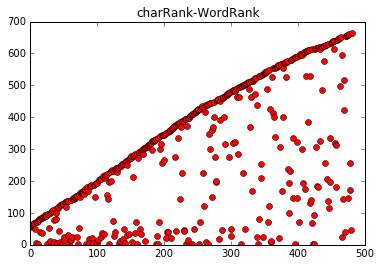

In [7]:
xx = big["1th_char_rank"]
plt.title('charRank-WordRank')
plt.plot(xx,'ro')

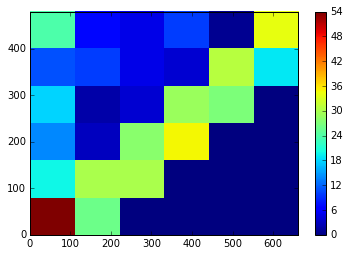

In [8]:
x = big["0th_char_rank"]
y = np.arange(len(x))
plt.hist2d(x,y, 6, cmap=plt.cm.jet)
plt.colorbar()

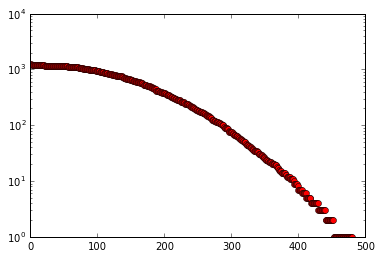

In [9]:
yy = word['wordFreq']
plt.yscale('log')
#plt.xscale('log')
plt.plot(yy,'ro')

In [10]:
check_const_ratio(word)


wordRank  ratio:  [ 0.94178794  0.97350993  0.97505669  0.9744186   0.98329356  0.98543689
  0.98522167  0.9975      0.98746867  0.99746193  0.98727735  0.9871134
  0.99477807  0.98425197  0.992       0.99731183  0.99460916  0.99728997
  0.99184783  0.9890411   0.99722992  0.98888889  0.99438202  0.99152542
  0.997151    0.99714286  0.99426934  0.99711816  0.99421965]
std=  0.0112678642028


array([  4.81000000e+02,   9.41787942e-01,   9.73509934e-01,
         9.75056689e-01,   9.74418605e-01,   9.83293556e-01,
         9.85436893e-01,   9.85221675e-01,   9.97500000e-01,
         9.87468672e-01,   9.97461929e-01,   9.87277354e-01,
         9.87113402e-01,   9.94778068e-01,   9.84251969e-01,
         9.92000000e-01,   9.97311828e-01,   9.94609164e-01,
         9.97289973e-01,   9.91847826e-01,   9.89041096e-01,
         9.97229917e-01,   9.88888889e-01,   9.94382022e-01,
         9.91525424e-01,   9.97150997e-01,   9.97142857e-01,
         9.94269341e-01,   9.97118156e-01,   9.94219653e-01,
         2.90697674e-03])